In [2]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline
from patsy import dmatrices
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df  = pd.read_csv("Project 2/train.csv")

In [4]:
df

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,38,F,2015-10-20T08:33:56Z,2015-10-23T00:00:00Z,Friday,No-Show,0,0,0,0,1,0,0,0,-3
1,56,F,2014-02-03T10:05:26Z,2014-02-20T00:00:00Z,Thursday,No-Show,1,0,1,0,0,0,0,1,-17
2,27,F,2014-04-29T07:57:32Z,2014-05-20T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-21
3,24,M,2014-04-02T13:53:37Z,2014-05-06T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-34
4,48,F,2014-01-07T10:07:17Z,2014-01-30T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209995,53,F,2015-04-06T10:49:44Z,2015-04-07T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1
209996,20,F,2015-04-09T12:54:38Z,2015-04-10T00:00:00Z,Friday,Show-Up,0,0,1,0,0,0,0,0,-1
209997,59,F,2014-07-22T15:20:48Z,2014-07-31T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-9
209998,9,M,2014-05-14T08:26:00Z,2014-05-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,1,0,1,-13


In [5]:
df['Age'].unique()

array([ 38,  56,  27,  24,  48,  35,  37,  59,  70,   7,  30,  47,  34,
        51,  22,  31,  20,  12,  61,  62,   0,  57,  65,  49,  53,  71,
        55,   9,  16,  58,  52,   3,  77,  74,  40,  21,  26,  64,  17,
        15,  82,  73,  69,   8,  13,  46,  43,  14,   1,  54,  66,  10,
         4,  41,  42,  39,   5,   6,  67,  11,  60,  29,  23,  63,  25,
        78,  87,  28,  45,  32,  18,  72,  76,  50,  86,  84,  44,  83,
        19,  36,  75,  33,  79,  88,  80,  81,  85,   2,  68,  98,  90,
        93,  96,  91,  97,  89,  92,  94,  95, 113, 100,  99, 102,  -1,
       101, 108, 103])

In [6]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [7]:
df['AppointmentRegistration'].unique()

array(['2015-10-20T08:33:56Z', '2014-02-03T10:05:26Z',
       '2014-04-29T07:57:32Z', ..., '2014-07-22T15:20:48Z',
       '2014-05-14T08:26:00Z', '2014-04-07T15:08:51Z'], dtype=object)

In [8]:
df['ApointmentData'].unique()

array(['2015-10-23T00:00:00Z', '2014-02-20T00:00:00Z',
       '2014-05-20T00:00:00Z', '2014-05-06T00:00:00Z',
       '2014-01-30T00:00:00Z', '2014-05-15T00:00:00Z',
       '2015-05-04T00:00:00Z', '2014-05-14T00:00:00Z',
       '2014-05-27T00:00:00Z', '2014-09-25T00:00:00Z',
       '2015-10-01T00:00:00Z', '2014-05-30T00:00:00Z',
       '2015-07-06T00:00:00Z', '2014-06-16T00:00:00Z',
       '2014-12-01T00:00:00Z', '2015-08-17T00:00:00Z',
       '2015-11-26T00:00:00Z', '2014-02-06T00:00:00Z',
       '2014-08-15T00:00:00Z', '2015-03-04T00:00:00Z',
       '2014-03-13T00:00:00Z', '2015-09-01T00:00:00Z',
       '2015-11-27T00:00:00Z', '2015-01-22T00:00:00Z',
       '2015-09-03T00:00:00Z', '2015-08-20T00:00:00Z',
       '2015-01-06T00:00:00Z', '2015-05-05T00:00:00Z',
       '2014-09-12T00:00:00Z', '2014-01-03T00:00:00Z',
       '2014-11-04T00:00:00Z', '2014-12-08T00:00:00Z',
       '2014-05-29T00:00:00Z', '2014-11-18T00:00:00Z',
       '2014-04-14T00:00:00Z', '2015-03-02T00:00:00Z',
       '20

In [9]:
df['DayOfTheWeek'].unique()

array(['Friday', 'Thursday', 'Tuesday', 'Monday', 'Wednesday', 'Saturday',
       'Sunday'], dtype=object)

In [10]:
df['Status'].unique()

array(['No-Show', 'Show-Up'], dtype=object)

In [11]:
df = df.drop(["Age","Gender","AppointmentRegistration","ApointmentData","DayOfTheWeek","Status"], axis=1)

In [12]:
df

,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,0,0,0,0,1,0,0,0,-3
1,1,0,1,0,0,0,0,1,-17
2,0,0,0,0,0,0,0,0,-21
3,0,0,0,0,0,0,0,0,-34
4,0,0,0,0,0,0,0,1,-23
...,...,...,...,...,...,...,...,...,...
209995,0,0,0,0,0,0,0,0,-1
209996,0,0,1,0,0,0,0,0,-1
209997,0,0,0,0,0,0,0,1,-9
209998,0,0,0,0,0,1,0,1,-13


In [13]:
df.corr()

,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
Diabetes,1.000000,0.022698,0.424703,0.058318,0.039698,-0.029506,0.000038,-0.030665,0.023085
Alcoolism,0.022698,1.000000,0.071788,0.014952,0.380258,0.038402,0.042680,-0.019083,0.024206
HiperTension,0.424703,0.071788,1.000000,0.075900,0.077375,-0.033460,-0.005231,-0.045079,0.044353
Handcap,0.058318,0.014952,0.075900,1.000000,0.022191,-0.004442,-0.002720,-0.022109,0.008897
Smokes,0.039698,0.380258,0.077375,0.022191,1.000000,0.061733,0.025190,-0.008696,0.027997
Scholarship,-0.029506,0.038402,-0.033460,-0.004442,0.061733,1.000000,0.007131,0.017222,0.016202
Tuberculosis,0.000038,0.042680,-0.005231,-0.002720,0.025190,0.007131,1.000000,-0.005378,0.004195
Sms_Reminder,-0.030665,-0.019083,-0.045079,-0.022109,-0.008696,0.017222,-0.005378,1.000000,-0.236462
AwaitingTime,0.023085,0.024206,0.044353,0.008897,0.027997,0.016202,0.004195,-0.236462,1.000000


In [14]:
df.isnull().sum()/len(df)*100

Diabetes        0.0
Alcoolism       0.0
HiperTension    0.0
Handcap         0.0
Smokes          0.0
Scholarship     0.0
Tuberculosis    0.0
Sms_Reminder    0.0
AwaitingTime    0.0
dtype: float64

In [15]:
from sklearn.preprocessing import MinMaxScaler

mn = MinMaxScaler()
df_mn = mn.fit_transform(df)

df_num_df = pd.DataFrame(df_mn, columns=df.columns, index=df.index)

In [16]:
df_num_df.head()

,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.994962
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.5,0.959698
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.949622
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.916877
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.944584


In [17]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

In [18]:
from sklearn.cluster import AgglomerativeClustering

In [19]:
cluster = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")

In [20]:
from sklearn.cluster import KMeans

In [21]:
km = KMeans(n_clusters=2)

In [22]:
mod = km.fit_predict(df_num_df)

In [23]:
km.labels_

array([0, 1, 0, ..., 0, 0, 1], dtype=int32)

In [24]:
km.inertia_

59918.44199041103

In [25]:
from sklearn.metrics import silhouette_score

In [26]:
import seaborn as sns

Text(0, 0.5, 'inertia')

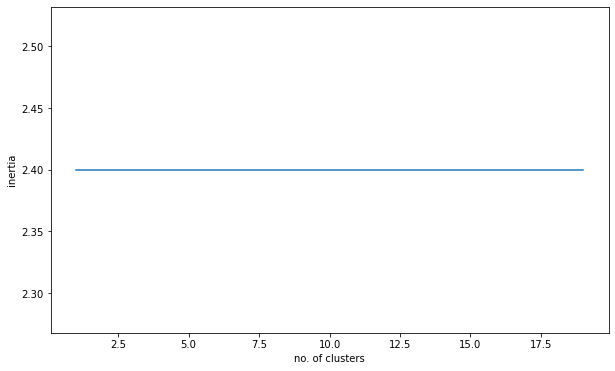

In [31]:
plt.figure(figsize=(10,6))
sns.lineplot(range(1,20), 2.4, markers="o")
plt.xlabel("no. of clusters")
plt.ylabel("inertia")

In [32]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(df_num_df.iloc[:,0:4], df_num_df['Diabetes'])

# Predicted class
print(neigh.predict(test))




NameError: name 'test' is not defined